In [18]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [3]:
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### 1. How long was the experiment run for? 


In [5]:
# duration of this experiment
df['timestamp']=pd.to_datetime(df['timestamp'])

In [6]:
df['timestamp'].max()-df['timestamp'].min()

Timedelta('115 days 16:41:40.789831')

### 2. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [4]:
df.action.value_counts()

view     6328
click    1860
Name: action, dtype: int64

### 5. Define the click through rate (CTR) for this experiment.

Click through rate is :
old page:
the number of clicks to view explore course of old page/total no of ciclks on old homepage
New homepage;
the number of clicks to view explore course of new page/total no of ciclks on new homepage 

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

- H_1: $CTR_{new}$ <= H_0: $CTR_{old}$
- H_1: $CTR_{new}$ > H_0: $CTR_{old}$

In [7]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "click"').count()[0] / control_df.query('action == "view"').count()[0]

# Display click through rate
control_ctr

0.2797118847539016

In [9]:
# Get dataframe with all records from experiment group
experiment_df = df.query('group=="experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action=="click"').count()[0]/experiment_df.query('action == "view"').count()[0]

# Display click through rate
experiment_ctr 

0.3097463284379172

In [10]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr-control_ctr

# Display observed difference
obs_diff

0.030034443684015644

In [13]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping and checking whether the observed difference is significant or not
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').count()[0] / control_df.query('action == "view"').count()[0]
    experiment_ctr = experiment_df.query('action == "click"').count()[0] / experiment_df.query('action == "view"').count()[0]
    diffs.append(experiment_ctr - control_ctr)


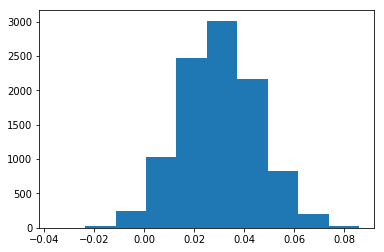

In [14]:
#PLOTTING difference
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);

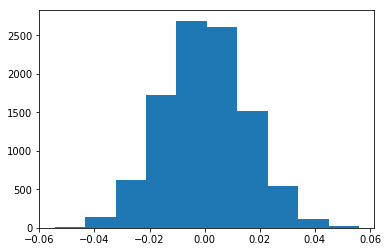

In [15]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0,diffs.std(),diffs.size)

# Plot the null distribution
plt.hist(null_vals);

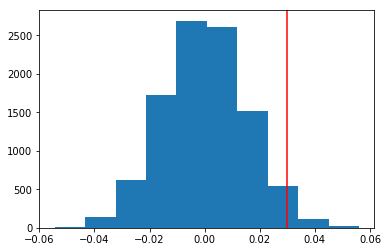

In [16]:
# Plot observed statistic with the null distibution
plt.hist(null_vals)
plt.axvline(x=obs_diff,color="red");


In [17]:
# Compute p-value
(null_vals>obs_diff).mean()

0.0237

Conclusion : Since p-value is less than 0.05 that is type I error rate thus rejecting null hypothesis.Thus experiment page has more traffic then the control page